In [1]:
# impots 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import tree

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import LeaveOneOut

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

## Uploadin Data

In [2]:

df = pd.read_csv('heart.csv')
#print first 10 rows
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Playing With Data


our data has no nulls and no other chars to represent it. all our data is numeric - therefore, no enumeration needed.

In [4]:
healthy = df[(df['target'] ==0) ].count()[1]#check number of people have disease
sick = df[(df['target'] ==1) ].count()[1]
print ("num of pepole without heart disease: "+ str(healthy))
print ("num of pepole with chance for heart disease: "+ str(sick))

num of pepole without heart disease: 138
num of pepole with chance for heart disease: 165


In [5]:
# we will nurmaize the data and split it to test and train.
# we choose to splite 30-70 because we have a small data set and we want to have enough  validation examples.
# split data table into data X and class labels y

X = df.iloc[:,0:13].values#not including target
y = df.iloc[:,13].values

print(X.shape)
print(y.shape)



(303, 13)
(303,)


In [6]:
#normalize the my whole data into o to 1 range

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

dfNorm = pd.DataFrame(X_std, index=df.index, columns=df.columns[0:13])
dfNorm.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [7]:
# # add non-feature target column to dataframe
dfNorm['target'] = df['target']


X = dfNorm.iloc[:,0:13].values
y = dfNorm.iloc[:,13].values
dfNorm.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
5,0.290464,0.681005,-0.938515,0.478391,-1.048678,-0.417635,0.898962,-0.072018,-0.696631,-0.551783,-0.649113,-0.714429,-2.148873,1
6,0.180175,-1.468418,0.032031,0.478391,0.922521,-0.417635,-1.005832,0.146634,-0.696631,0.224643,-0.649113,-0.714429,-0.512922,1
7,-1.143291,0.681005,0.032031,-0.663867,0.323431,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,-0.714429,1.123029,1
8,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029,1
9,0.290464,0.681005,1.002577,1.049520,-1.512490,-0.417635,0.898962,1.064975,-0.696631,0.483451,0.976352,-0.714429,-0.512922,1


In [8]:
#split into testing and training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

((212, 13), (212,), (91, 13), (91,))

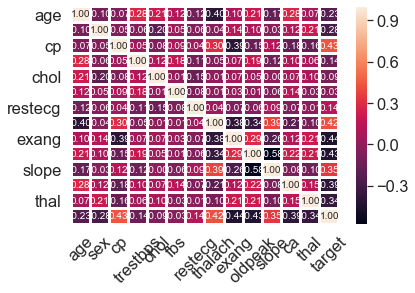

In [9]:
#pearson coreelation between all features of my dataframe
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);

## Making Helping Functions

In [10]:
#helping functions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS#sequential feature selection for regression and classification
def sfs_features(algo_name,features_nums):#pass algo name and number of feautres 
    sfs_name=SFS(algo_name, 
                k_features=features_nums,# (1, 4 ) (mix, max) if provide min max then SFS will consider return any feature combiantion between min and max that scored highest in corss-validation (1,5) then return any combination from 1 up to 4 features instead of a fized number of feaure k 
                forward=True, #if forward is true then forward otherwise backward
                floating=False, #add a conditional exclustion/inclusion if true
                scoring='accuracy', #default used accuracy for sklearn classifiers and r2 for regressors have maby [ accuracy, f1, precion, recall, roc_auc ] classifiers and for regression [MAR(mean absolute erroe),MSR(mean square eror ),NMSR(negative mean square eror),median absolute error,r2] for regression
                cv=5  #if cv in integer and classifer estimator than startified k-flod otherwise regular k-fold cross-validation is perfromed, no cross validation if cv is none , flase or 0
                 )
    #n_job also a parmaeter of SFS for teeling number of cpu evaluting different subfeatures
    return sfs_name

In [11]:
#use these at last to show the accuracy of every algo i will use this in predict funtion because everyoe will call it

results_test = {}
results_train = {}
list_algos=[]

In [12]:
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)
def predict_data(algo_name,X_train,y_train,X_test,y_test,atype='',verbose=0):
    algo_name.fit(X_train, y_train)#simply fit data on my testing and training dataset
    Y_pred = algo_name.predict(X_test)#Prediction value on my testing dataset of my model
   # y_pred =algo_name.predict(X_test)
    #MAE = mean_absolute_error(y_test, y_pred)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)#Accuracy on training data and simpy roud uptop 2 decimal digits
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)#Accuracy on testing data
    #append accuraccy on test 
    #training
    #store algo name
    results_test[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]+'_'+str(atype)] = acc_train
    list_algos.append(str(algo_name)[0:str(algo_name).find('(')])
    if verbose ==0:
        print("accuracy on  training: " + str(acc_train))
        print("accuracy on  testing: "+ str(acc_val))
    else:
        return Y_pred

In [13]:
def print_features(sfs_name='sfs1',verbose=0):
    a= (sfs_name.k_feature_idx_[0],sfs_name.k_feature_idx_[1],sfs_name.k_feature_idx_[2])
    if verbose ==0:
        print('Selected features:', sfs_name.k_feature_idx_)
        for i in range (len (sfs_name.k_feature_idx_)):
            print (df.iloc[:,sfs_name.k_feature_idx_[i]].name)
    return a

In [14]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

def roc_graph_cv(algo_name,X,y,cvn=5):
    # Run classifier with cross-validation and plot ROC curves
    cv = StratifiedKFold(n_splits=cvn)
    classifier =algo_name

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X[train], y[train].ravel()).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test].ravel(), probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [15]:
## helping function

def confusion(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

## PCA
Principal component analysis (PCA) is a technique used to emphasize variation and bring out strong patterns in a dataset.
we use it first make data easy to explore and visualize.

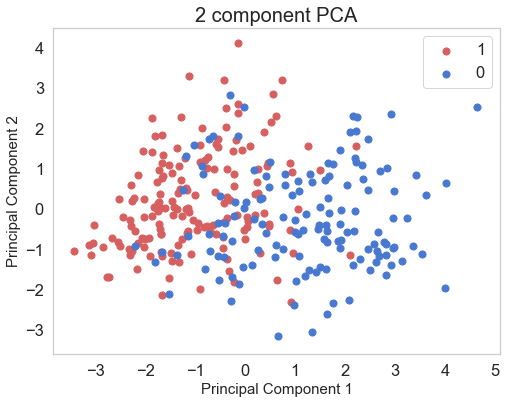

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1,0]
colors = ['r',  'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Define The Algorithems
1- first we will run each algorithem on all the features
2 - then we will use SFS to compere and check improvment.
3-  we will use sfs to take automatically from 1 to 5 features as the algorithum suggests

# lightgbm Classifier

In [17]:
###############################################################################
# applying lightGBM
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label = y_train)
params = {}

clf = lgb.train(params, d_train, 100)
#Prediction
y_pred = clf.predict(X_test)
#convert into binary values
for i in range(0, len(y_pred)):
    if y_pred[i]>= 0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0
       
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = clf.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for LightGBM = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for LightGBM = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))





Accuracy for training set for LightGBM = 0.9905660377358491
Accuracy for test set for LightGBM = 0.8021978021978022


# K Folding

In [18]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)#here i can specify how many folds i want to create
#kf is the object of KFOLD as above i made
for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    

# XGBoost Classifier

In [19]:

###############################################################################
# applying XGBoost

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 0)

from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
y_pred = xg.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = xg.predict(X_train)

for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:  
       y_pred_train[i]=0
       
cm_train = confusion_matrix(y_pred_train, y_train)
print()
print('Accuracy for training set for XGBoost = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for XGBoost = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



print(classification_report(y_test, xg.predict(X_test)))


Accuracy for training set for XGBoost = 0.989010989010989
Accuracy for test set for XGBoost = 0.5666666666666667
              precision    recall  f1-score   support

           0       1.00      0.57      0.72        30
           1       0.00      0.00      0.00         0

    accuracy                           0.57        30
   macro avg       0.50      0.28      0.36        30
weighted avg       1.00      0.57      0.72        30



C:\Users\Server\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [20]:
X = df.iloc[:,0:13].values#not including target
y = df.iloc[:,13].values

#split into testing and training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=10)#here i can specify how many folds i want to create
##kf is the object of KFOLD as above i made
#for train_index, test_index in kf.split(X,y):
#    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
#                                       y[train_index], y[test_index]

((272, 13), (272,), (31, 13), (31,))

In [21]:
def split(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n, random_state=0)
    X_train.shape, y_train.shape, X_test.shape , y_test.shape

In [22]:
def fold(n):
    kf = KFold(n_splits=10)#here i can specify how many folds i want to create
    #kf is the object of KFOLD as above i made
    for train_index, test_index in kf.split(X,y):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]

In [23]:
split(0.3)

## LDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
predict_data(lda,X_train,y_train,X_test,y_test)
print(classification_report(y_test, lda.predict(X_test)))

accuracy on  training: 82.72
accuracy on  testing: 80.65
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        17
           1       0.75      0.86      0.80        14

    accuracy                           0.81        31
   macro avg       0.81      0.81      0.81        31
weighted avg       0.81      0.81      0.81        31



In [25]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)#here i can specify how many folds i want to create
#kf is the object of KFOLD as above i made
for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    

In [26]:
>>> X = [1, 2, 3, 4]
>>> loo = LeaveOneOut()
>>> for train, test in loo.split(X):
...     print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [27]:
#predicting sfs:
sfs_1 =sfs_features(lda,(1,4))
sfs_1 = sfs_1.fit(X_train, y_train)
selectedFeatures = print_features(sfs_1)#it  will tell that which best features it have selected for us

#plot3D(sfs_1.k_feature_idx_[0],sfs_1.k_feature_idx_[1],sfs_1.k_feature_idx_[2],'knn')


#now i  fit my model 
X_train_sfs = sfs_1.transform(X_train)#recduce X to it's most important features
X_test_sfs = sfs_1.transform(X_test)
print('\nNow See the differece \n')
predict_data(lda,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, lda.predict(X_test_sfs)))

Selected features: (2, 8, 9, 12)
cp
exang
oldpeak
thal

Now See the differece 

accuracy on  training: 83.88
accuracy on  testing: 53.33
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        30
           1       0.00      0.00      0.00         0

    accuracy                           0.53        30
   macro avg       0.50      0.27      0.35        30
weighted avg       1.00      0.53      0.70        30



C:\Users\Server\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
print(classification_report(y_test, lda.predict(X_test_sfs)))

              precision    recall  f1-score   support

           0       1.00      0.53      0.70        30
           1       0.00      0.00      0.00         0

    accuracy                           0.53        30
   macro avg       0.50      0.27      0.35        30
weighted avg       1.00      0.53      0.70        30



C:\Users\Server\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


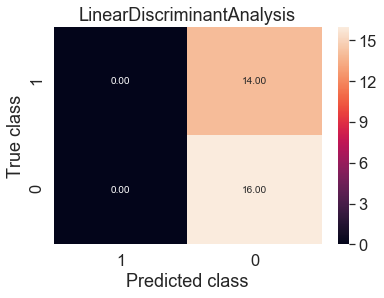

In [29]:
confusion(lda,X_test_sfs, y_test)

In [30]:
#now check roc curve
roc_graph_cv(lda,X[:,selectedFeatures],y)

TypeError: list indices must be integers or slices, not tuple

## Random Forest

In [31]:
##split into testing and training dataset
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#
#X_train.shape, y_train.shape, X_test.shape , y_test.shape

from sklearn.model_selection import KFold
kf = KFold(n_splits=5)#here i can specify how many folds i want to create
#kf is the object of KFOLD as above i made
for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]

ValueError: Found input variables with inconsistent numbers of samples: [4, 303]

In [32]:
X = df.iloc[:,0:13].values#not including target
y = df.iloc[:,13].values

#split into testing and training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

#from sklearn.model_selection import KFold
#kf = KFold(n_splits=10)#here i can specify how many folds i want to create
##kf is the object of KFOLD as above i made
#for train_index, test_index in kf.split(X,y):
#    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
#                                       y[train_index], y[test_index]

((242, 13), (242,), (61, 13), (61,))

In [33]:
### RANDOM FOREST
# Train: Random Forest
random_forest = RandomForestClassifier(n_estimators=50, random_state = 0)
predict_data(random_forest,X_train,y_train,X_test,y_test)
print(classification_report(y_test, random_forest.predict(X_test)))

accuracy on  training: 100.0
accuracy on  testing: 83.61
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.88      0.82      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.84      0.83        61
weighted avg       0.84      0.84      0.84        61



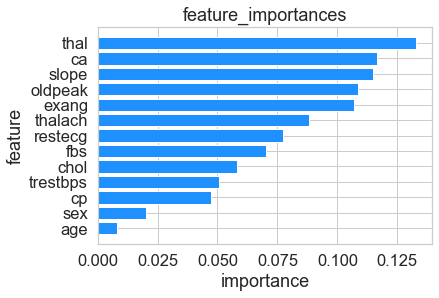

In [34]:
feature_importance = random_forest.feature_importances_#(the higher the more important featuire)
feat_importances = pd.Series(random_forest.feature_importances_, index=df.columns[:-1])
feat_importances = feat_importances.nlargest(13)#reurn largest n element

feature = df.columns.values.tolist()[0:-1]
importance = sorted(random_forest.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

In [35]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [36]:
##split into testing and training dataset
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#
#X_train.shape, y_train.shape, X_test.shape , y_test.shape

from sklearn.model_selection import KFold
kf = KFold(n_splits=10)#here i can specify how many folds i want to create
#kf is the object of KFOLD as above i made
for train_index, test_index in kf.split(X,y):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]

In [37]:
#taking the best 5 features give as smaller result.
currlist =[2,12,10,9,11]
# print (currlist)

random_forest = RandomForestClassifier(n_estimators=100, random_state = 0)
predict_data(random_forest,X_train[:,currlist],y_train,X_test[:,currlist],y_test,'FS')
print(classification_report(y_test, random_forest.predict(X_test[:,currlist])))

accuracy on  training: 95.97
accuracy on  testing: 56.67
              precision    recall  f1-score   support

           0       1.00      0.57      0.72        30
           1       0.00      0.00      0.00         0

    accuracy                           0.57        30
   macro avg       0.50      0.28      0.36        30
weighted avg       1.00      0.57      0.72        30



C:\Users\Server\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [38]:
sfs_1=sfs_features(random_forest,(1,5))
sfs_1 = sfs_1.fit(X_train, y_train)
selectedFeatures = print_features(sfs_1)


X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

print ("\n")
predict_data(random_forest,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, random_forest.predict(X_test)))

Selected features: (2, 11, 12)
cp
ca
thal


accuracy on  training: 87.91
accuracy on  testing: 63.33


ValueError: Number of features of the model must match the input. Model n_features is 3 and input n_features is 13 

In [ ]:
print(classification_report(y_test, random_forest.predict(X_test_sfs)))
confusion(random_forest,X_test_sfs, y_test)

In [ ]:
roc_graph_cv(random_forest,X[:,selectedFeatures],y)

## Decision Tree

In [ ]:
### DECISION TREE
#  descion tree
dect = tree.DecisionTreeClassifier(criterion='gini')

predict_data(dect,X_train,y_train,X_test,y_test)

In [ ]:
#split into testing and training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, y_train.shape, X_test.shape , y_test.shape

In [ ]:
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_features(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

predict_data(dect,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

In [ ]:
print(classification_report(y_test, dect.predict(X_test_sfs)))
confusion(dect,X_test_sfs, y_test)

In [ ]:
roc_graph_cv(dect,X[:,selectedFeatures],y)

## Gradient Boosting

In [ ]:
# Gradient Boosting
# Train: Gradient Boosting
gbc = GradientBoostingClassifier(loss='exponential', learning_rate=0.03, n_estimators=75 , max_depth=6)
predict_data(gbc,X_train,y_train,X_test,y_test)

In [ ]:
sfs_1=sfs_features(gbc,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_features(sfs_1)


X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

print ("\n")
predict_data(gbc,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')

In [ ]:
print(classification_report(y_test, gbc.predict(X_test_sfs)))
conf(gbc,X_test_sfs, y_test)

In [ ]:
roc_graph_cv(gbc,X[:,selectedFeatures],y)

## KNN 

In [ ]:
#### KNN 
##to choose the right K we build a loop witch examen all the posible values for K. 
from sklearn import model_selection

#Neighbors
neighbors = [x for x in list(range(1,50)) if x % 2 == 0]

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    #print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(( "The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k])))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
#at 10 number of neighbour max accuracy
cv_preds = []

#Perform 10-fold cross validation on testing set for odd values of k
seed=123
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    preds = model_selection.cross_val_predict(knn, X_test, y_test, cv=kfold)
    cv_preds.append(metrics.accuracy_score(y_test, preds)*100)
    #print("k=%d %0.2f" % (k_value, 100*metrics.accuracy_score(test_y, preds)))

optimal_k = neighbors[cv_preds.index(max(cv_preds))]
print("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_preds[optimal_k]))

plt.plot(neighbors, cv_preds)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [ ]:
# at 6 7 give maximum on testing dataset so i will use this
# KNN
knn = KNeighborsClassifier(n_neighbors = 6)
predict_data(knn,X_train,y_train,X_test,y_test)

In [ ]:
sfs_1=sfs_features(knn,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_features(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

predict_data(knn,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, knn.predict(X_test_sfs)))
conf(knn,X_test_sfs, y_test)

In [ ]:
roc_graph_cv(knn,X[:,selectedFeatures],y)

## SVM

In [ ]:
### SVM 
#  SVM
svm = SVC(kernel='linear', probability=True)
predict_data(svm,X_train,y_train,X_test,y_test,'linear')    

In [ ]:
#  SVM checking different kernal functions

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
 
 # when i was running it was giving error simply write above block of the code

svm = SVC(kernel='poly', probability=True)
predict_data(svm,X_train,y_train,X_test,y_test,'poly')

In [ ]:
#  SVM
svm = SVC(kernel='rbf', probability=True)
predict_data(svm,X_train,y_train,X_test,y_test,'rbf')

In [ ]:
sfs_1=sfs_features(svm,(1,5))
sfs_1 = sfs_1.fit(X, y)
selectedFeatures = print_features(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

predict_data(svm,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, svm.predict(X_test_sfs)))
confusion(svm,X_test_sfs, y_test)

In [ ]:
roc_graph_cv(svm,X[:,selectedFeatures],y)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


logit_regr = LogisticRegression()#make object of logistic regression()
#from sklearn.naive_bayes import GaussianNB
#model = GaussianNB()
predict_data(logit_regr,X_train,y_train,X_test,y_test)

 

In [ ]:
sfs_1=sfs_features(logit_regr,(1,5))
sfs_1 = sfs_1.fit(X_train, y_train)
selectedFeatures = print_features(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

predict_data(logit_regr,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, logit_regr.predict(X_test_sfs)))
confusion(logit_regr,X_test_sfs, y_test)

In [ ]:
# print (results_test)

df_test =pd.DataFrame(list(results_test.items()),columns=['algo_name','acc_test'])
df_train =pd.DataFrame(list(results_train.items()),columns=['algo_name','acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test',ascending=False)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# set jupyter's max row display
pd.set_option('display.max_row', 100)

# set jupyter's max column width to 50
pd.set_option('display.max_columns', 50)

# Load the dataset
ax = df_results[['acc_test', 'acc_train']].plot(kind='barh',
              figsize=(10,7), color=['dodgerblue', 'slategray'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("The Best ALGO with SFS is?",
fontsize=18)
ax.set_xlabel("ACC", fontsize=18)
ax.set_ylabel("Algo Names", fontsize=18)
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100,110])
ax.set_yticklabels(df_results.iloc[:,0].values.tolist())

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+7, i.get_y()+.1, \
            str(round((i.get_width()), 2)), fontsize=11, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

## Naive Baye's

In [ ]:


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


#logit_regr = LogisticRegression()#make object of logistic regression()
from sklearn.naive_bayes import GaussianNB
naiv_bays = GaussianNB()
predict_data(naiv_bays,X_train,y_train,X_test,y_test)

In [ ]:
sfs_1=sfs_features(naiv_bays,(1,5))
sfs_1 = sfs_1.fit(X_train, y_train)
selectedFeatures = print_features(sfs_1)

X_train_sfs = sfs_1.transform(X_train)
X_test_sfs = sfs_1.transform(X_test)

predict_data(naiv_bays,X_train_sfs,y_train,X_test_sfs,y_test,'sfs')
print(classification_report(y_test, naiv_bays.predict(X_test_sfs)))
confusion(naiv_bays,X_test_sfs, y_test)

In [ ]:
df_test =pd.DataFrame(list(results_test.items()),
                      columns=['algo_name','acc_test'])
df_train =pd.DataFrame(list(results_train.items()),
                      columns=['algo_name','acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test',ascending=False)

# Ensembe Learning

In [ ]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

 Bagging

In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 25)
bg.fit(X_train,y_train) 

In [ ]:
bg.score(X_test,y_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
bg = BaggingClassifier(SVC(), max_samples= 0.5, max_features = 1.0, n_estimators = 25)
bg.fit(X_train,y_train) 
bg.score(X_test,y_test)

In [ ]:
bg = BaggingClassifier(KNeighborsClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 25)
bg.fit(X_train,y_train) 
bg.score(X_test,y_test)

In [ ]:
bg = BaggingClassifier(LogisticRegression(), max_samples= 0.5, max_features = 1.0, n_estimators = 25)
bg.fit(X_train,y_train) 
bg.score(X_test,y_test)

In [ ]:
bg = BaggingClassifier(GradientBoostingClassifier(), max_samples= 0.5, max_features = 1.0, n_estimators = 25)
bg.fit(X_train,y_train) 
bg.score(X_test,y_test)

Boosting

In [ ]:
#Boosting - Ada Boost

#it mostly overfit model

adb = AdaBoostClassifier(LogisticRegression(),n_estimators = 5, learning_rate = 1)
adb.fit(X_train,y_train)
adb.score(X_test,y_test)

Voting Classifier

In [ ]:
# Voting Classifier - Multiple Model Ensemble 
#we can use it to make own ensemble model
kn =  KNeighborsClassifier(n_neighbors = 6)
gb = GradientBoostingClassifier()
lr = LogisticRegression()
dt = RandomForestClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [ ]:
evc = VotingClassifier( estimators= [('dt',dt),('kn',kn)], voting = 'hard')
evc.fit(X_train,y_train)
evc.score(X_test, y_test)

In [ ]:
df_test =pd.DataFrame(list(results_test.items()),
                      columns=['algo_name','acc_test'])
df_train =pd.DataFrame(list(results_train.items()),
                      columns=['algo_name','acc_train'])
df_results = df_test.join(df_train.set_index('algo_name'), on='algo_name')
df_results.sort_values('acc_test',ascending=False)

## Neural Network